In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os

# Define the path to the zip file with the corrected filename
zip_file_path = '/content/drive/MyDrive/Cartoon Images Dataset.zip'
output_directory = 'cartoon_dataset'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Unzip the file to the specified output directory
!unzip -q "{zip_file_path}" -d "{output_directory}"

print(f"'{zip_file_path}' unzipped to '{output_directory}'")
print(f"Contents of '{output_directory}':")
!ls -F "{output_directory}"


'/content/drive/MyDrive/Cartoon Images Dataset.zip' unzipped to 'cartoon_dataset'
Contents of 'cartoon_dataset':
'Cartoon Images Dataset'/


In [8]:
print(f"Contents of '{output_directory}/Cartoon Images Dataset/':")
!ls -F "{output_directory}/Cartoon Images Dataset/"

Contents of 'cartoon_dataset/Cartoon Images Dataset/':
 Conan/		 Doremon/	  Minions/   Naruto/	       Shinchan/
'Donald Duck'/	'Mickey Mouse'/   Mr.Bean/  'Olaf (Frozen)'/   Spongebob/


In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the base directory where the unzipped dataset is located
# The previous step confirmed the path 'cartoon_dataset/Cartoon Images Dataset/'
base_dir = os.path.join(output_directory, 'Cartoon Images Dataset')

# Check if the directory exists
if not os.path.exists(base_dir):
    print(f"Error: Base directory '{base_dir}' not found.")
else:
    print(f"Base directory set to: {base_dir}")
    print("Listing contents of base directory to confirm character folders:")
    !ls -F "{base_dir}"

# Create an ImageDataGenerator object
# Rescale images by 1/255 for normalization, which is a common preprocessing step
datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to load images directly from the directory structure
# This method automatically infers class labels from subfolder names.
image_generator = datagen.flow_from_directory(
    base_dir,                          # Source directory for the images
    target_size=(224, 224),            # All images will be resized to 224x224 pixels
    batch_size=32,                     # Number of images to yield per batch
    class_mode='categorical',          # For multi-class classification, labels are one-hot encoded
    shuffle=True                       # Shuffle the order of images in batches
)

# Identify the 6 unique character classes
print(f"\nFound {image_generator.num_classes} unique character classes.")
# Corrected: Access class names from the keys of class_indices dictionary
print(f"Class names (inferred from directory structure): {list(image_generator.class_indices.keys())}")
print(f"Class indices: {image_generator.class_indices}")

# Get one batch of images and labels to demonstrate the output format
# This converts a batch from the iterator into numpy arrays
first_batch_images, first_batch_labels = next(image_generator)
print(f"\nShape of images in the first batch: {first_batch_images.shape}")
print(f"Shape of labels in the first batch: {first_batch_labels.shape}")
print(f"Sample labels from the first batch (one-hot encoded):\n{first_batch_labels[:5]}")

Base directory set to: cartoon_dataset/Cartoon Images Dataset
Listing contents of base directory to confirm character folders:
 Conan/		 Doremon/	  Minions/   Naruto/	       Shinchan/
'Donald Duck'/	'Mickey Mouse'/   Mr.Bean/  'Olaf (Frozen)'/   Spongebob/
Found 1256 images belonging to 10 classes.

Found 10 unique character classes.
Class names (inferred from directory structure): ['Conan', 'Donald Duck', 'Doremon', 'Mickey Mouse', 'Minions', 'Mr.Bean', 'Naruto', 'Olaf (Frozen)', 'Shinchan', 'Spongebob']
Class indices: {'Conan': 0, 'Donald Duck': 1, 'Doremon': 2, 'Mickey Mouse': 3, 'Minions': 4, 'Mr.Bean': 5, 'Naruto': 6, 'Olaf (Frozen)': 7, 'Shinchan': 8, 'Spongebob': 9}

Shape of images in the first batch: (32, 224, 224, 3)
Shape of labels in the first batch: (32, 10)
Sample labels from the first batch (one-hot encoded):
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object specifically for data augmentation
# Rescale images by 1/255 for normalization, consistent with previous steps
# Apply various augmentation techniques:
#   rotation_range: Degree range for random rotations.
#   width_shift_range: Fraction of total width, for randomly shifting images horizontally.
#   height_shift_range: Fraction of total height, for randomly shifting images vertically.
#   shear_range: Shear Intensity (shear angle in radians).
#   zoom_range: Range for random zoom.
#   horizontal_flip: Randomly flip inputs horizontally.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' # Strategy for filling in newly created pixels after a rotation or a width/height shift
)

print("ImageDataGenerator for training (with augmentation) created successfully.")

ImageDataGenerator for training (with augmentation) created successfully.


In [11]:
import os

# Initialize empty lists to store image paths and labels
image_paths = []
labels = []

# Iterate through each subdirectory (character class) in the base_dir
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)

    # Ensure it's a directory before proceeding
    if os.path.isdir(class_dir):
        # Iterate through image files within each class directory
        for image_name in os.listdir(class_dir):
            # Construct the full path to the image file
            image_path = os.path.join(class_dir, image_name)

            # Append to our lists if it's a file (and implicitly an image)
            if os.path.isfile(image_path):
                image_paths.append(image_path)
                labels.append(class_name)

# Print the total number of images found
print(f"Total number of images found: {len(image_paths)}")

# Display the first few entries from both lists to verify
print("\nFirst 5 image paths:")
for i in range(min(5, len(image_paths))):
    print(image_paths[i])

print("\nFirst 5 labels:")
for i in range(min(5, len(labels))):
    print(labels[i])

Total number of images found: 1292

First 5 image paths:
cartoon_dataset/Cartoon Images Dataset/Mickey Mouse/104-1048440_mickey-mouse-clip-art-9-mickey-mouse-flying.png
cartoon_dataset/Cartoon Images Dataset/Mickey Mouse/classicmickey-face3s.gif
cartoon_dataset/Cartoon Images Dataset/Mickey Mouse/634.mm.cm.111612_copy.jpg
cartoon_dataset/Cartoon Images Dataset/Mickey Mouse/630-6305586_skateboard-clipart-mickey-mouse-clubhouse-mickey-mouse-op.png
cartoon_dataset/Cartoon Images Dataset/Mickey Mouse/544-5441580_mickey-mouse-clubhouse-clipart-set-mickey-mouse-bright.png

First 5 labels:
Mickey Mouse
Mickey Mouse
Mickey Mouse
Mickey Mouse
Mickey Mouse


In [12]:
import pandas as pd

# Create a DataFrame from image_paths and labels
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# Display the first few rows of the DataFrame and its information
print("DataFrame created successfully.")
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()


DataFrame created successfully.
First 5 rows of the DataFrame:
                                          image_path         label
0  cartoon_dataset/Cartoon Images Dataset/Mickey ...  Mickey Mouse
1  cartoon_dataset/Cartoon Images Dataset/Mickey ...  Mickey Mouse
2  cartoon_dataset/Cartoon Images Dataset/Mickey ...  Mickey Mouse
3  cartoon_dataset/Cartoon Images Dataset/Mickey ...  Mickey Mouse
4  cartoon_dataset/Cartoon Images Dataset/Mickey ...  Mickey Mouse

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  1292 non-null   object
 1   label       1292 non-null   object
dtypes: object(2)
memory usage: 20.3+ KB


In [13]:
from sklearn.model_selection import train_test_split

# Step 2: Split the main DataFrame `df` into training (train_df) and a temporary DataFrame (temp_df)
# 70% for training, 30% for temporary (which will be further split into validation and test)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)

# Step 3: Split the `temp_df` into validation (val_df) and test (test_df) sets
# 50% of temp_df for validation (15% of original), 50% of temp_df for test (15% of original)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

# Step 4: Print the shape (number of rows) of each DataFrame
print(f"Shape of training DataFrame (train_df): {train_df.shape}")
print(f"Shape of validation DataFrame (val_df): {val_df.shape}")
print(f"Shape of test DataFrame (test_df): {test_df.shape}")

Shape of training DataFrame (train_df): (904, 2)
Shape of validation DataFrame (val_df): (194, 2)
Shape of test DataFrame (test_df): (194, 2)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Instantiate val_test_datagen for validation and test sets (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

print("ImageDataGenerator for validation and test (without augmentation) created successfully.")

# Define common parameters for flow_from_dataframe
TARGET_SIZE = (224, 224)
BATCH_SIZE = 32
CLASS_MODE = 'categorical'

# 2. Create training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=True
)

# 3. Create validation data generator
val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=False # Do not shuffle validation data
)

# 4. Create test data generator
test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=False # Do not shuffle test data
)

# 5. Print class_indices to confirm the mapping
print(f"\nClass indices from train_generator: {train_generator.class_indices}")

print("Data generators for training, validation, and testing created successfully.")

ImageDataGenerator for validation and test (without augmentation) created successfully.
Found 881 validated image filenames belonging to 10 classes.
Found 186 validated image filenames belonging to 10 classes.
Found 189 validated image filenames belonging to 10 classes.

Class indices from train_generator: {'Conan': 0, 'Donald Duck': 1, 'Doremon': 2, 'Mickey Mouse': 3, 'Minions': 4, 'Mr.Bean': 5, 'Naruto': 6, 'Olaf (Frozen)': 7, 'Shinchan': 8, 'Spongebob': 9}
Data generators for training, validation, and testing created successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 23 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 8 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 5 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the Sequential model
model = Sequential()

# Add the first Convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)))
model.add(MaxPooling2D((2, 2)))

# Add the second Convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output to feed into Dense layers
model.add(Flatten())

# Add a Dense layer for classification
model.add(Dense(128, activation='relu'))

# Add the output Dense layer with softmax activation for multi-class classification
# Use len(train_generator.class_indices) to get the number of unique character classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Print the model summary to review the architecture
print("CNN Model Architecture:")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,682 (91.20 MB)

 Trainable params: 23,908,682 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the Sequential model
model = Sequential()

# Add the first Convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)))
model.add(MaxPooling2D((2, 2)))

# Add the second Convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output to feed into Dense layers
model.add(Flatten())

# Add a Dense layer for classification
model.add(Dense(128, activation='relu'))

# Add the output Dense layer with softmax activation for multi-class classification
# Use len(train_generator.class_indices) to get the number of unique character classes
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Print the model summary to review the architecture
print("CNN Model Architecture:")
model.summary()

CNN Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,682 (91.20 MB)

 Trainable params: 23,908,682 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.optimizers import Adam

# Compile the model
# Optimizer: Adam is a popular choice for many tasks
# Loss Function: categorical_crossentropy is used for multi-class classification with one-hot encoded labels
# Metrics: 'accuracy' to monitor the model's performance during training
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy metric.")

Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy metric.


In [19]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

print("Model training initiated. Training history stored in 'history' variable.")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 868ms/step - accuracy: 0.1347 - loss: 7.1940 - val_accuracy: 0.3763 - val_loss: 1.9669
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 676ms/step - accuracy: 0.3915 - loss: 1.8689 - val_accuracy: 0.4785 - val_loss: 1.6746
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 667ms/step - accuracy: 0.5284 - loss: 1.4604 - val_accuracy: 0.7043 - val_loss: 0.9864
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 652ms/step - accuracy: 0.6219 - loss: 1.2903 - val_accuracy: 0.7258 - val_loss: 0.9163
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 699ms/step - accuracy: 0.6373 - loss: 1.1217 - val_accuracy: 0.7043 - val_loss: 0.8778
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 651ms/step - accuracy: 0.6667 - loss: 1.0029 - val_accuracy: 0.7258 - val_loss: 0.8981
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 701ms/step - accuracy: 0.7177 - loss: 0.9181 - val_accuracy: 0.7366 - val_loss: 0.8705
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 653ms/step - accuracy: 0.6995 - loss: 0.9233 - val_accu

In [20]:
print("Model training has already been completed in the previous step.")
print("You can access the training history using the 'history' variable.")
print("Keys in history.history: ", history.history.keys())

Model training has already been completed in the previous step.
You can access the training history using the 'history' variable.
Keys in history.history:  dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [21]:
print("Evaluating model on the test set...")
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Evaluating model on the test set...
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 666ms/step - accuracy: 0.7421 - loss: 1.5476

Test Loss: 1.2891
Test Accuracy: 0.7407


In [23]:
from sklearn.metrics import classification_report
import numpy as np

print("Generating predictions for the test set...")
# Get true labels from the test_generator
# Reset the test_generator to ensure predictions start from the beginning of the dataset
test_generator.reset()
true_labels = test_generator.classes

# Get class names in the order they appear in the generator
class_labels = list(test_generator.class_indices.keys())

# Predict probabilities for the test set
# steps = total number of samples / batch size
predictions = model.predict(test_generator, steps=len(test_df) // BATCH_SIZE + (1 if len(test_df) % BATCH_SIZE else 0))
predicted_classes = np.argmax(predictions, axis=1)


print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_labels))


Generating predictions for the test set...


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step

Classification Report:
               precision    recall  f1-score   support

        Conan       0.65      0.89      0.76        19
  Donald Duck       0.56      0.78      0.65        18
      Doremon       0.87      0.65      0.74        20
 Mickey Mouse       0.64      0.50      0.56        18
      Minions       0.80      0.73      0.76        22
      Mr.Bean       0.68      1.00      0.81        19
       Naruto       1.00      0.54      0.70        13
Olaf (Frozen)       0.71      0.71      0.71        21
     Shinchan       0.92      0.55      0.69        20
    Spongebob       0.90      1.00      0.95        19

     accuracy                           0.74       189
    macro avg       0.77      0.74      0.73       189
 weighted avg       0.77      0.74      0.74       189



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Generating Confusion Matrix...


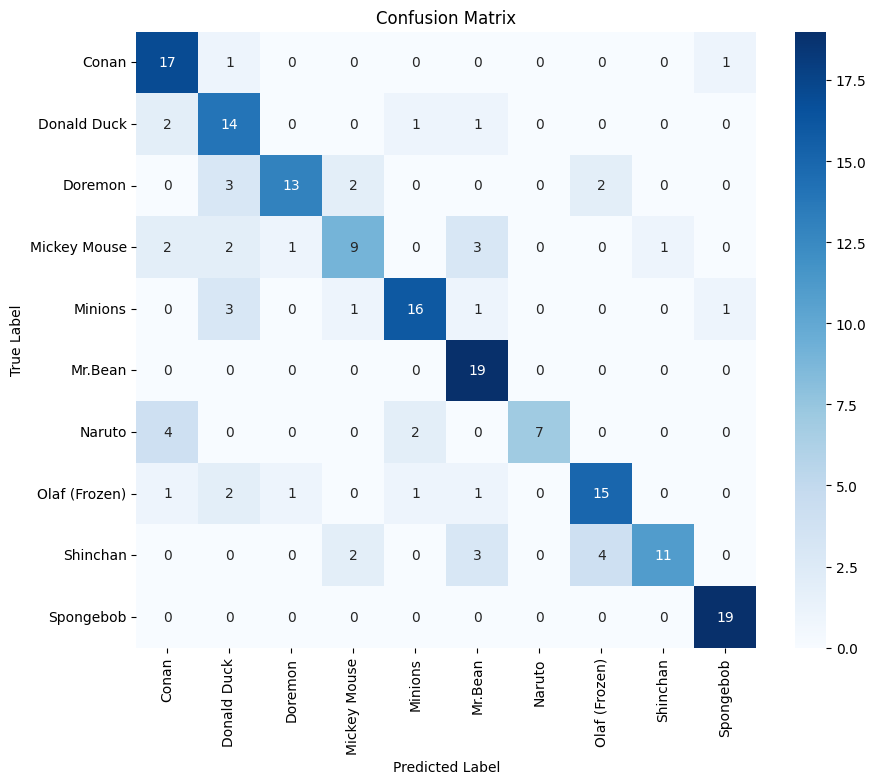

Confusion matrix displayed.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Generating Confusion Matrix...")

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix displayed.")

Generating training history plots...


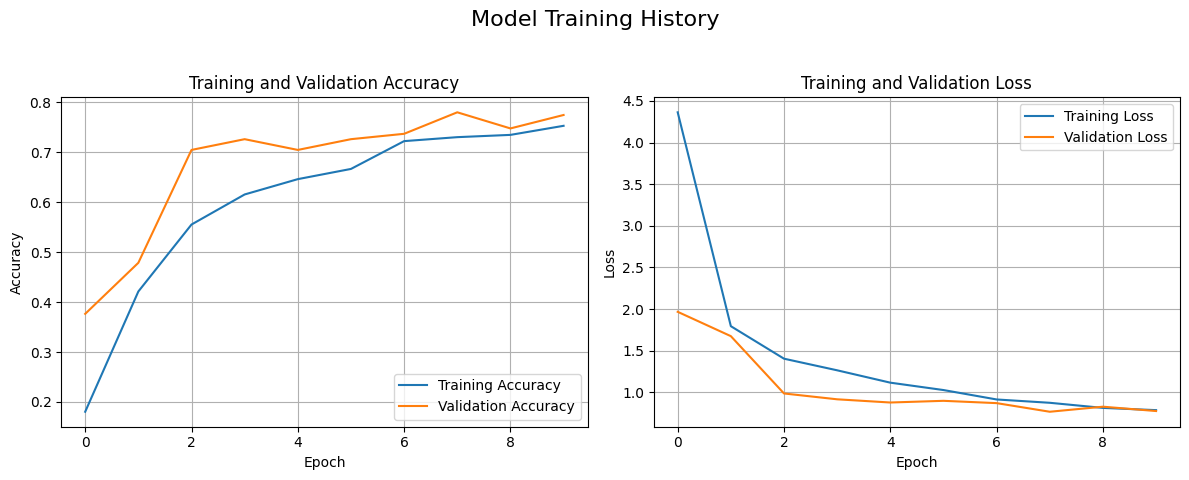

Training history plots displayed.


In [25]:
import matplotlib.pyplot as plt

print("Generating training history plots...")

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Subplot 2: Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Add a main title to the figure
plt.suptitle('Model Training History', fontsize=16)

# Ensure proper spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to prevent suptitle overlap

# Display the plot
plt.show()

print("Training history plots displayed.")

In [35]:
from google.colab import files

print("Please upload your image file(s) using the widget below:")
uploaded = files.upload()

print("Upload complete.")
print(f"Uploaded files: {list(uploaded.keys())}")

Please upload your image file(s) using the widget below:


Saving 28-289206_mickey-mouse-tv-series-clip-art-disney-clip.png to 28-289206_mickey-mouse-tv-series-clip-art-disney-clip.png
Upload complete.
Uploaded files: ['28-289206_mickey-mouse-tv-series-clip-art-disney-clip.png']


In [36]:
from PIL import Image
import io
import numpy as np

print("Starting image preprocessing...")

# 1. Get the filename of the uploaded image
# Assuming only one file was uploaded, take the first key from the dictionary
filename = list(uploaded.keys())[0]
print(f"Processing uploaded file: {filename}")

# 2. Read the content of the uploaded image file as bytes
image_bytes = io.BytesIO(uploaded[filename])

# 3. Open the image using PIL
img = Image.open(image_bytes)

# 4. Resize the image to TARGET_SIZE and convert to RGB (if not already)
# TARGET_SIZE is (224, 224) as defined in previous steps
# Use Image.LANCZOS for high-quality downsampling
img = img.resize(TARGET_SIZE, Image.LANCZOS).convert('RGB')

# 5. Convert the resized image into a NumPy array and normalize pixel values to [0, 1]
img_array = np.array(img)
img_array = img_array / 255.0

# 6. Add an extra dimension to the image array to create a batch dimension
# Model expects input in the shape (batch_size, height, width, channels)
processed_image = np.expand_dims(img_array, axis=0)

print(f"Image '{filename}' preprocessed successfully. Shape: {processed_image.shape}")

Starting image preprocessing...
Processing uploaded file: 28-289206_mickey-mouse-tv-series-clip-art-disney-clip.png
Image '28-289206_mickey-mouse-tv-series-clip-art-disney-clip.png' preprocessed successfully. Shape: (1, 224, 224, 3)


In [37]:
print("Predicting the class for the uploaded image...")

# 1. Use the model.predict() method on the processed_image
predictions_single = model.predict(processed_image)

# 2. Find the index of the class with the highest probability
predicted_class_index = np.argmax(predictions_single, axis=1)[0]

# 3. Get the confidence score for the predicted class
confidence_score = predictions_single[0][predicted_class_index]

# 4. Retrieve the actual predicted class name
# class_labels was defined in a previous step
predicted_class_name = class_labels[predicted_class_index]

# 5. Print the predicted_class_name and confidence_score
print(f"Predicted Class: {predicted_class_name}")
print(f"Confidence Score: {confidence_score:.4f}")

Predicting the class for the uploaded image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: Mickey Mouse
Confidence Score: 0.9883


Displaying the uploaded image with its prediction...


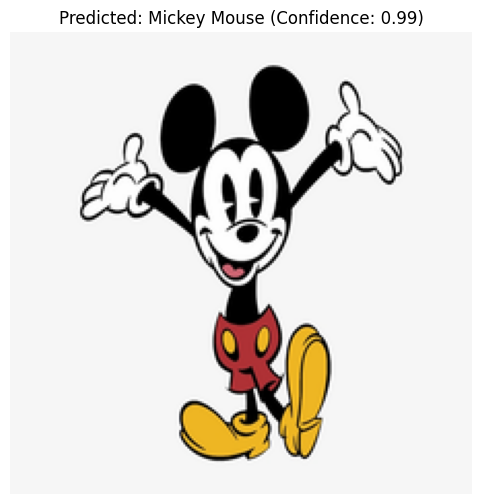

Image and prediction displayed successfully.


In [38]:
import matplotlib.pyplot as plt

print("Displaying the uploaded image with its prediction...")

# Create a figure and an axes object
plt.figure(figsize=(6, 6))

# Display the image
plt.imshow(img)

# Set the title with predicted class and confidence score
plt.title(f"Predicted: {predicted_class_name} (Confidence: {confidence_score:.2f})")

# Turn off axis ticks and labels for cleaner display
plt.axis('off')

# Display the plot
plt.show()

print("Image and prediction displayed successfully.")